<a href="https://colab.research.google.com/github/Hrotich/Warehouse-management/blob/main/warehouse_management_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To classify the package status

In [1]:
# inmport necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load  dataset
data = pd.read_excel("/content/china shipment.xlsx")

In [3]:
# view data
data.head()

,Name,Tracking,weight,arrival date,Dispacthed date,status
0,Rose,423,78.0,2024-06-05,2024-01-07 00:00:00,Despatched
1,June,423,34.0,2024-06-05,0,instore
2,Mwangi,674,65.0,2024-06-05,2024-01-07 00:00:00,Despatched
3,kibe,456,4.0,2024-06-05,0,instore
4,Frank,385,3.0,2024-06-09,2024-01-07 00:00:00,Despatched


In [4]:
# checking te shape
data.shape # 12 entries and 6 variables

(39, 6)

In [5]:
# Data wrangling
data.isnull().sum()

,0
Name,0
Tracking,0
weight,0
arrival date,0
Dispacthed date,0
status,0


In [6]:
# handling misssing values by droping the dispatched date variable
data= data.drop(['Dispacthed date',"arrival date"],axis=1)

In [7]:
data

,Name,Tracking,weight,status
0,Rose,423,78.0,Despatched
1,June,423,34.0,instore
2,Mwangi,674,65.0,Despatched
3,kibe,456,4.0,instore
4,Frank,385,3.0,Despatched
5,Uknown1,567,6.0,instore
6,Uknown2,879,8.0,Despatched
7,Uknown4,457,19.0,instore
8,Tabitha,786,73.0,Despatched
9,Frida,987,23.0,instore


In [8]:
# Data preperations

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [9]:
data['status']=en.fit_transform(data['status'])

In [10]:
data
#where 1 means out and 0 is not dispatched

,Name,Tracking,weight,status
0,Rose,423,78.0,0
1,June,423,34.0,1
2,Mwangi,674,65.0,0
3,kibe,456,4.0,1
4,Frank,385,3.0,0
5,Uknown1,567,6.0,1
6,Uknown2,879,8.0,0
7,Uknown4,457,19.0,1
8,Tabitha,786,73.0,0
9,Frida,987,23.0,1


In [11]:
# Spliting data set to features and label
target=data['status']# target variable


In [12]:
# features
features = data.drop(['status','Name'], axis=1)
features

,Tracking,weight
0,423,78.0
1,423,34.0
2,674,65.0
3,456,4.0
4,385,3.0
5,567,6.0
6,879,8.0
7,457,19.0
8,786,73.0
9,987,23.0


In [13]:
# Feature selection
# Train test split
from sklearn.model_selection import train_test_split
y=target
x=features
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=0)

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg1= LogisticRegression(random_state=16)

# fit the model with data
logreg1.fit(x_train, y_train)

y_pred = logreg1.predict(x_test)

In [16]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8, 2],
       [2, 0]])

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.00      0.00      0.00         2

    accuracy                           0.67        12
   macro avg       0.40      0.40      0.40        12
weighted avg       0.67      0.67      0.67        12



##SVM

In [18]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [20]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


In [21]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)



SVC(gamma=0.1)

In [22]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [23]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


In [24]:
# Checking for default parameters
svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
#Hyperparamter tuning using Gridsearch
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [27]:
#Fitting the model
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
#Calculating the accuracy of tuned model
grid_svc = grid.predict(x_test)
accuracy_score(y_test,grid_svc)

0.6666666666666666

In [30]:
#Classification report for the tuned model
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.00      0.00      0.00         2

    accuracy                           0.67        12
   macro avg       0.40      0.40      0.40        12
weighted avg       0.67      0.67      0.67        12



##Decision trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)




DecisionTreeClassifier(max_depth=3)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


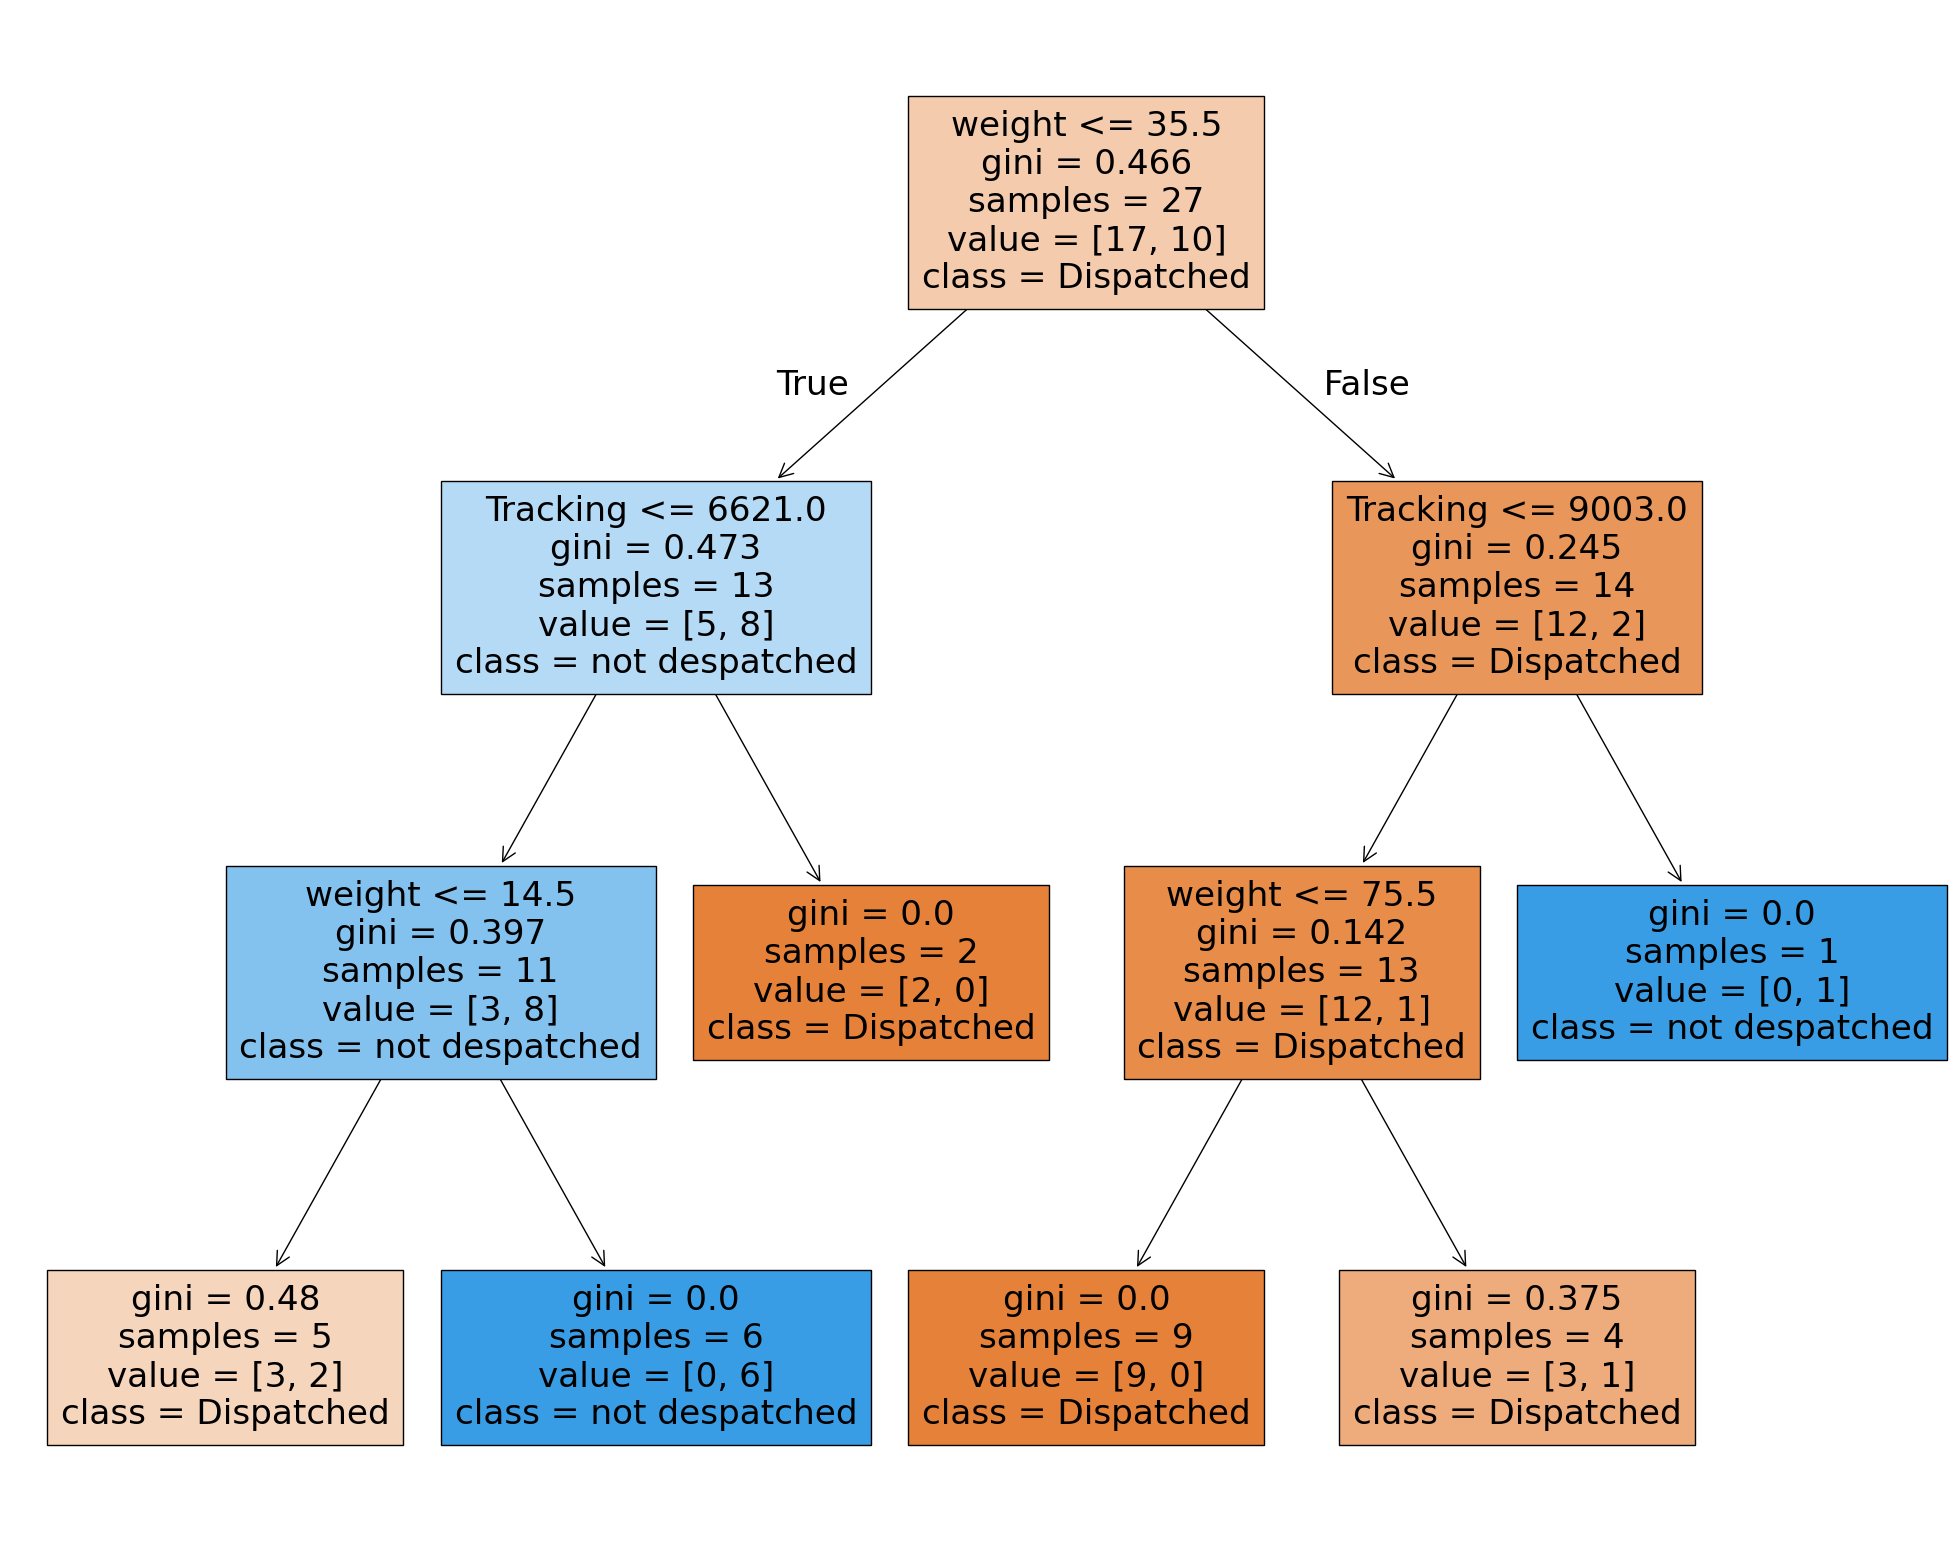

In [33]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=x.columns,
                   class_names=['Dispatched', 'not despatched'],
                   filled=True)

#Tuning parameters for decision trees

In [34]:
params = {"criterion":("gini", "entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1, 20))),
          "min_samples_split":[2, 3, 4],
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)



Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4)

In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


Model deployment

In [36]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [37]:
# pickling the model /moel saving
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(logreg1, pickle_out)
pickle_out.close()

In [38]:
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from PIL import Image

In [39]:
# loading in the model to predict on the data
pickle_in = open('classifier.pkl', 'rb')
logreg1 = pickle.load(pickle_in)


In [40]:
def welcome():
    return 'welcome all'

In [41]:
# defining the function which will make the prediction using
# the data which the user inputs
def prediction(Despatched,instore):

    prediction = classifier.predict(
        [[Despatched, instore]])
    print(prediction)
    return prediction

In [42]:
# this is the main function in which we define our webpage
def main():

    # giving the webpage a title
    st.title("Warehouse management")

In [43]:
# To define some of the front end elements of the web page like
    # the font and background color, the padding and the text to be displayed
html_temp = """
    <div style ="background-color:blue;padding:13px">
    <h1 style ="color:black;text-align:center;">Streamlit warehouse management Classifier ML App </h1>
    </div>
    """

    # this line allows us to display the front end aspects we have
    # defined in the above code
st.markdown(html_temp, unsafe_allow_html = True)

2025-03-06 12:13:29.814 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13:30.040 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-06 12:13:30.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [44]:
# the following lines create text boxes in which the user can enter
    # the data required to make the prediction
Despatched = st.text_input("despacthed", "Type Here")
instore = st.text_input("instore", "Type Here")
result =""

    # the below line ensures that when the button called 'Predict' is clicked,
    # the prediction function defined above is called to make the prediction
    # and store it in the variable result
if st.button("Predict"):
  result = prediction(sepal_length, sepal_width, petal_length, petal_width)
  st.success('The output is {}'.format(result))

if __name__=='__main__':
    main()

2025-03-06 12:13:30.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13:30.062 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13:30.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13:30.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13:30.067 Session state does not function when running a script without `streamlit run`
2025-03-06 12:13:30.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13:30.069 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13:30.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 12:13

##https://www.datacamp.com/tutorial/understanding-logistic-regres

##https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
#https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning#Hyperparameter-Tuning-with-GridSearchCV

# Task
Tell me about this dataset.

Here is all the data you need:
"china shipment.xlsx"

## Data loading

### Subtask:
Load the "china shipment.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first 5 rows.



In [45]:
import pandas as pd

try:
    df = pd.read_excel('china shipment.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: 'china shipment.xlsx' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Name,Tracking,weight,arrival date,Dispacthed date,status
0,Rose,423,78.0,2024-06-05,2024-01-07 00:00:00,Despatched
1,June,423,34.0,2024-06-05,0,instore
2,Mwangi,674,65.0,2024-06-05,2024-01-07 00:00:00,Despatched
3,kibe,456,4.0,2024-06-05,0,instore
4,Frank,385,3.0,2024-06-09,2024-01-07 00:00:00,Despatched


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, missing values, descriptive statistics, and unique values for categorical columns.



In [46]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Identify data types of each column
print("\nData types of each column:\n", df.dtypes)

# Investigate missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Calculate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Examine unique values and frequencies for categorical columns
for col in ['Name', 'Tracking', 'status']:  # Assuming these are categorical
    print(f"\nUnique values and frequencies for '{col}':\n{df[col].value_counts()}")

Shape of the DataFrame: (39, 6)

Data types of each column:
 Name                       object
Tracking                    int64
weight                    float64
arrival date       datetime64[ns]
Dispacthed date            object
status                     object
dtype: object

Missing values per column:
 Name               0
Tracking           0
weight             0
arrival date       0
Dispacthed date    0
status             0
dtype: int64

Descriptive statistics for numerical columns:
            Tracking      weight                   arrival date
count     39.000000   39.000000                             39
mean    5871.102564   44.348718  2024-06-08 12:18:27.692307712
min      127.000000    3.000000            2024-06-05 00:00:00
25%      832.500000   18.000000            2024-06-05 00:00:00
50%     4512.000000   42.000000            2024-06-09 00:00:00
75%     6189.000000   67.000000            2024-06-12 00:00:00
max    80024.000000  134.000000            2024-06-12 00:00:00
s

## Data analysis

### Subtask:
Analyze the data to identify potential patterns and relationships between variables.


**Reasoning**:
Calculate the correlation matrix for numerical features, examine the distribution of the 'status' column, investigate the relationship between 'weight' and 'status', and explore the relationship between dispatch and arrival dates.



In [47]:
# Calculate the correlation matrix for numerical features
numerical_features = ['Tracking', 'weight']
correlation_matrix = df[numerical_features].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Examine the distribution of the 'status' column
status_counts = df['status'].value_counts(normalize=True)
print("\nStatus Distribution:\n", status_counts)

# Investigate the relationship between 'weight' and 'status'
average_weight_by_status = df.groupby('status')['weight'].mean()
print("\nAverage Weight by Status:\n", average_weight_by_status)

# Explore the relationship between dispatch date and arrival date
try:
    # Convert 'Dispacthed date' to datetime objects
    df['Dispacthed date'] = pd.to_datetime(df['Dispacthed date'], errors='coerce')
    # Calculate the time difference
    df['Shipping Duration'] = (df['arrival date'] - df['Dispacthed date']).dt.days
    print("\nShipping Duration:\n", df['Shipping Duration'].describe())
except Exception as e:
    print(f"\nError converting 'Dispacthed date' or calculating shipping duration: {e}")

Correlation Matrix:
           Tracking    weight
Tracking  1.000000  0.273058
weight    0.273058  1.000000

Status Distribution:
 status
Despatched    0.692308
instore       0.307692
Name: proportion, dtype: float64

Average Weight by Status:
 status
Despatched    46.022222
instore       40.583333
Name: weight, dtype: float64

Shipping Duration:
 count       36.000000
mean      5085.666667
std       8663.585929
min        150.000000
25%        153.000000
50%        156.000000
75%       5087.500000
max      19886.000000
Name: Shipping Duration, dtype: float64


## Data visualization

### Subtask:
Create visualizations to represent the key findings from the data exploration and analysis.


**Reasoning**:
Generate the visualizations as per the instructions, including a histogram for 'weight', a bar chart for 'status', a scatter plot for 'weight' vs. 'Tracking', and a histogram for 'Shipping Duration'.



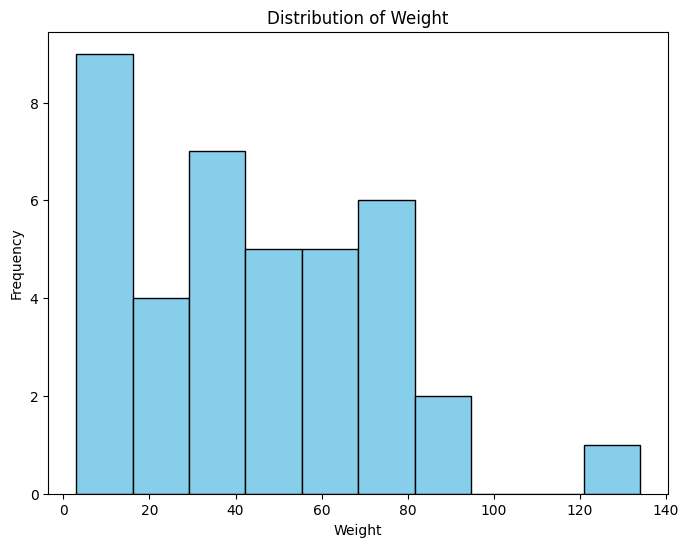

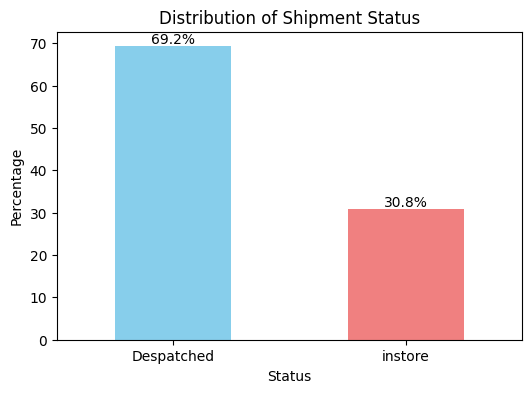

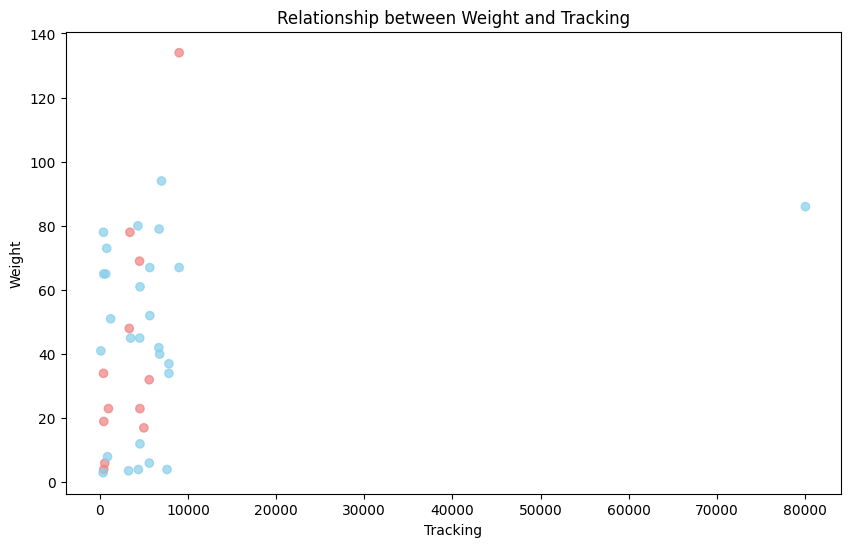

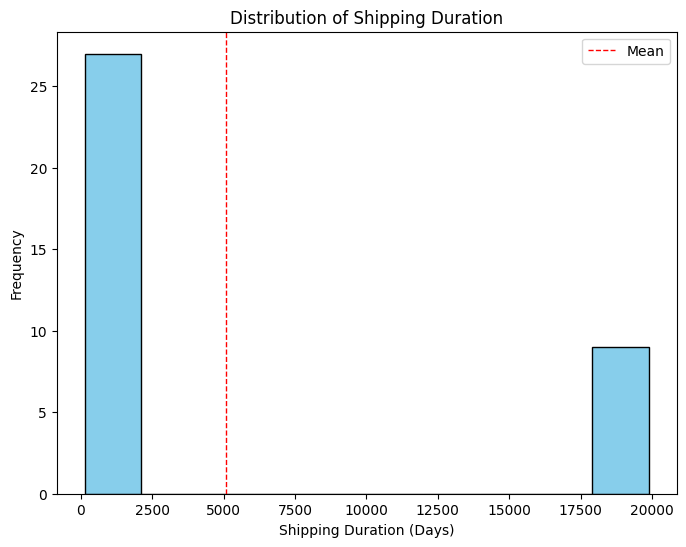

In [48]:
import matplotlib.pyplot as plt

# 1. Histogram for 'weight'
plt.figure(figsize=(8, 6))
plt.hist(df['weight'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# 2. Bar chart for 'status'
plt.figure(figsize=(6, 4))
status_counts = df['status'].value_counts(normalize=True) * 100
status_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Shipment Status')
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
for i, v in enumerate(status_counts):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.show()

# 3. Scatter plot for 'weight' vs 'Tracking'
plt.figure(figsize=(10, 6))
plt.scatter(df['Tracking'], df['weight'], c=df['status'].map({'Despatched': 'skyblue', 'instore': 'lightcoral'}), alpha=0.7)
plt.title('Relationship between Weight and Tracking')
plt.xlabel('Tracking')
plt.ylabel('Weight')
plt.show()

# 4. Histogram for 'Shipping Duration'
plt.figure(figsize=(8, 6))
plt.hist(df['Shipping Duration'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Shipping Duration')
plt.xlabel('Shipping Duration (Days)')
plt.ylabel('Frequency')
plt.axvline(df['Shipping Duration'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.show()

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly seeks to answer questions like:

* What is the distribution of shipment weights?
* What are the proportions of different shipment statuses?
* Is there a relationship between shipment weight and tracking number?
* What is the distribution of shipping durations?
* Are there any noticeable patterns or outliers in the data?


### 2. Data Analysis Key Findings

* **Moderate positive correlation between Tracking and weight:** A correlation of 0.27 suggests that higher tracking numbers tend to correspond with slightly higher weights, but the relationship isn't strong.
* **Imbalanced Status Distribution:**  69.2% of shipments are 'Despatched', while 30.8% are 'instore', indicating a potential class imbalance.
* **Average Weight Difference by Status:**  'Despatched' shipments have a slightly higher average weight (46.02) than 'instore' shipments (40.58).
* **High Variability in Shipping Duration:** The average shipping duration is approximately 5086 days, but the standard deviation is 8664 days, revealing significant variability in shipping times.  The maximum shipping duration is a surprisingly high 19886 days.

### 3. Insights or Next Steps

* **Investigate Outliers:**  The extremely high maximum shipping duration (19886 days) and the large standard deviation suggest the presence of outliers that may be skewing the analysis. Further investigation is needed to understand these outliers and determine whether they represent errors in the data or legitimate, albeit unusual, shipping times.
* **Feature Engineering:** Consider creating new features from the existing ones.  For instance, examining the month or quarter of the dispatch and arrival dates might reveal seasonal patterns in shipping times or status.  Additionally, categorize 'weight' into bins to see if this provides further insights.
